In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
l1 = cv2.cvtColor(cv2.imread("stereo_materials\\l1.png"), cv2.COLOR_BGR2RGB)
l2 = cv2.cvtColor(cv2.imread("stereo_materials\\l2.png"), cv2.COLOR_BGR2RGB)
l3 = cv2.cvtColor(cv2.imread("stereo_materials\\l3.png"), cv2.COLOR_BGR2RGB)

r1 = cv2.cvtColor(cv2.imread("stereo_materials\\r1.png"), cv2.COLOR_BGR2RGB)
r2 = cv2.cvtColor(cv2.imread("stereo_materials\\r2.png"), cv2.COLOR_BGR2RGB)
r3 = cv2.cvtColor(cv2.imread("stereo_materials\\r3.png"), cv2.COLOR_BGR2RGB)


In [3]:
print(l1.shape)
print(r1.shape)
print(l2.shape)
print(r2.shape)
print(l3.shape)
print(r3.shape)

(289, 382, 3)
(289, 382, 3)
(375, 450, 3)
(375, 450, 3)
(375, 450, 3)
(375, 450, 3)


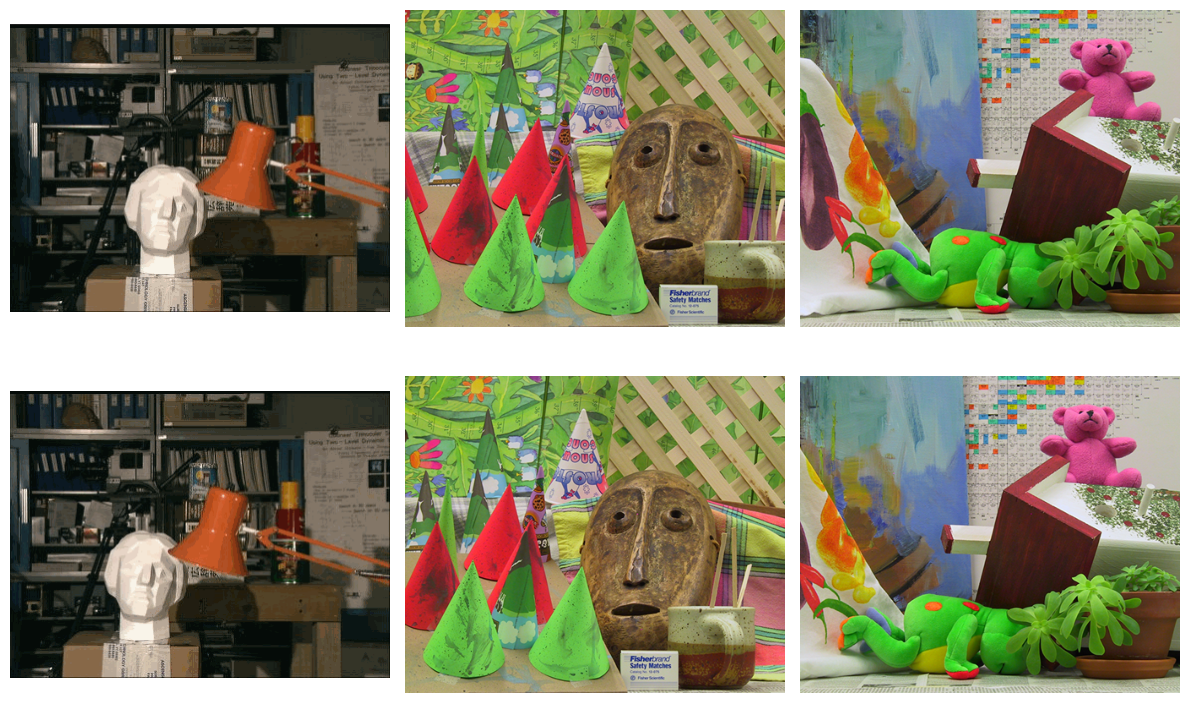

In [4]:

fig, axes = plt.subplots(2, 3, figsize=(12, 8))


axes[0, 0].imshow(l1)
axes[0, 0].axis("off")

axes[0, 1].imshow(l2)
axes[0, 1].axis("off")

axes[0, 2].imshow(l3)
axes[0, 2].axis("off")

axes[1, 0].imshow(r1)
axes[1, 0].axis("off")

axes[1, 1].imshow(r2)
axes[1, 1].axis("off")

axes[1, 2].imshow(r3)
axes[1, 2].axis("off")

plt.tight_layout()
plt.show()

In [5]:
l1 = cv2.cvtColor(l1, cv2.COLOR_RGB2GRAY)
l2 = cv2.cvtColor(l2, cv2.COLOR_RGB2GRAY)
l3 = cv2.cvtColor(l3, cv2.COLOR_RGB2GRAY)

r1 = cv2.cvtColor(r1, cv2.COLOR_RGB2GRAY)
r2 = cv2.cvtColor(r2, cv2.COLOR_RGB2GRAY)
r3 = cv2.cvtColor(r3, cv2.COLOR_RGB2GRAY)

In [6]:
print(l1.shape)
print(r1.shape)
print(l2.shape)
print(r2.shape)
print(l3.shape)
print(r3.shape)

(289, 382)
(289, 382)
(375, 450)
(375, 450)
(375, 450)
(375, 450)


In [22]:
def get_d_map(left_im, right_im,cost_fn,window_size):
    h = left_im.shape[0]
    w = left_im.shape[1]
    d_map = np.empty((h,w))
    MAX_DISPARITY = 32
    half_window = window_size // 2 # to avoid adding padding, we start from the start of the first kernel
    for i in range (half_window,h-half_window):
        for j in range(half_window,w-half_window): #Pass over all the possible blocks in left image
            rows = np.arange(i - half_window, i + half_window + 1)
            cols = np.arange(j - half_window, j + half_window + 1)
            left_ROI = left_im[np.ix_(rows, cols)]
            #calculate cost and keep the most matching block from the right image
            
            best_cost = np.inf
            best_matching_block = 0
            #loop over maximum disparity (32) This is to decrease computations "instead of running for 30 minutes to get all required window sizes with asll cost functions"
            search_start = max(j - MAX_DISPARITY, half_window)
            search_end = min(j + MAX_DISPARITY, w - half_window)
            for block_center in range(search_start, search_end):
                cost = 0
                r_rows = np.arange(i - half_window, i + half_window+ 1)
                r_cols = np.arange(block_center -half_window, block_center +half_window + 1)
                right_ROI = right_im[np.ix_(r_rows, r_cols)]
                if(cost_fn == "SAD"):
                    cost = np.sum(np.abs(left_ROI - right_ROI))
                elif(cost_fn == "SSD"):
                    cost = np.sum(np.square(left_ROI - right_ROI))

                if cost < best_cost:
                    best_cost = cost
                    best_matching_block = block_center
            #disparity is difference between pixel in left and on right side
            d_map[i,j] = np.absolute(j-best_matching_block)
    #normalized disparity map 
    normalized_d_map = (d_map - np.min(d_map)) / (np.max(d_map) - np.min(d_map)) * 255
    return d_map, normalized_d_map
            
            

In [23]:
WINDOW_SIZES = [1,5,9]
COST_FN = ['SAD','SSD']
d_maps = []
normalized_d_maps=[]

for c in COST_FN:
    for w_s in WINDOW_SIZES:
        dm , n_dm =  get_d_map(l1,r1,c,w_s)
        d_maps.append(dm)
        normalized_d_maps.append(n_dm)


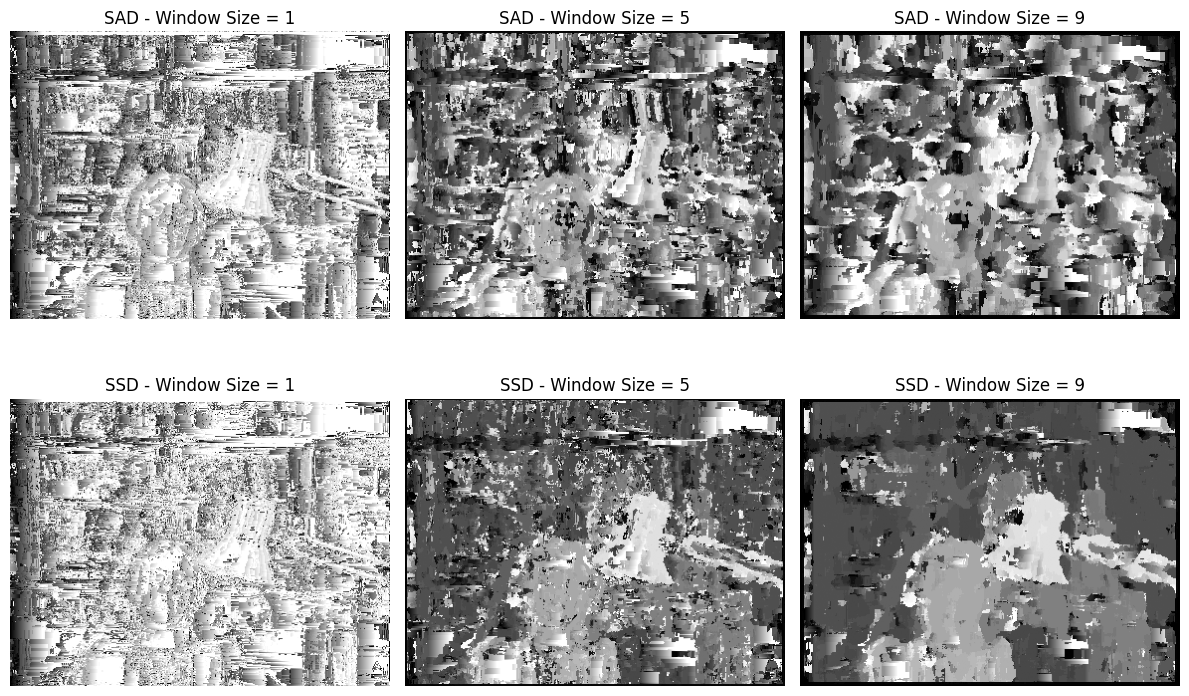

In [ ]:

fig, axes = plt.subplots(2, 3, figsize=(12, 8))

axes[0, 0].imshow(d_maps[0], cmap='gray')
axes[0, 0].set_title("SAD - Window Size = 1")
axes[0, 0].axis("off")

axes[0, 1].imshow(d_maps[1], cmap='gray')
axes[0, 1].set_title("SAD - Window Size = 5")
axes[0, 1].axis("off")

axes[0, 2].imshow(d_maps[2], cmap='gray')
axes[0, 2].set_title("SAD - Window Size = 9")
axes[0, 2].axis("off")

axes[1, 0].imshow(d_maps[3], cmap='gray')
axes[1, 0].set_title("SSD - Window Size = 1")
axes[1, 0].axis("off")

axes[1, 1].imshow(d_maps[4], cmap='gray')
axes[1, 1].set_title("SSD - Window Size = 5")
axes[1, 1].axis("off")

axes[1, 2].imshow(d_maps[5], cmap='gray')
axes[1, 2].set_title("SSD - Window Size = 9")
axes[1, 2].axis("off")

plt.tight_layout()
plt.show()


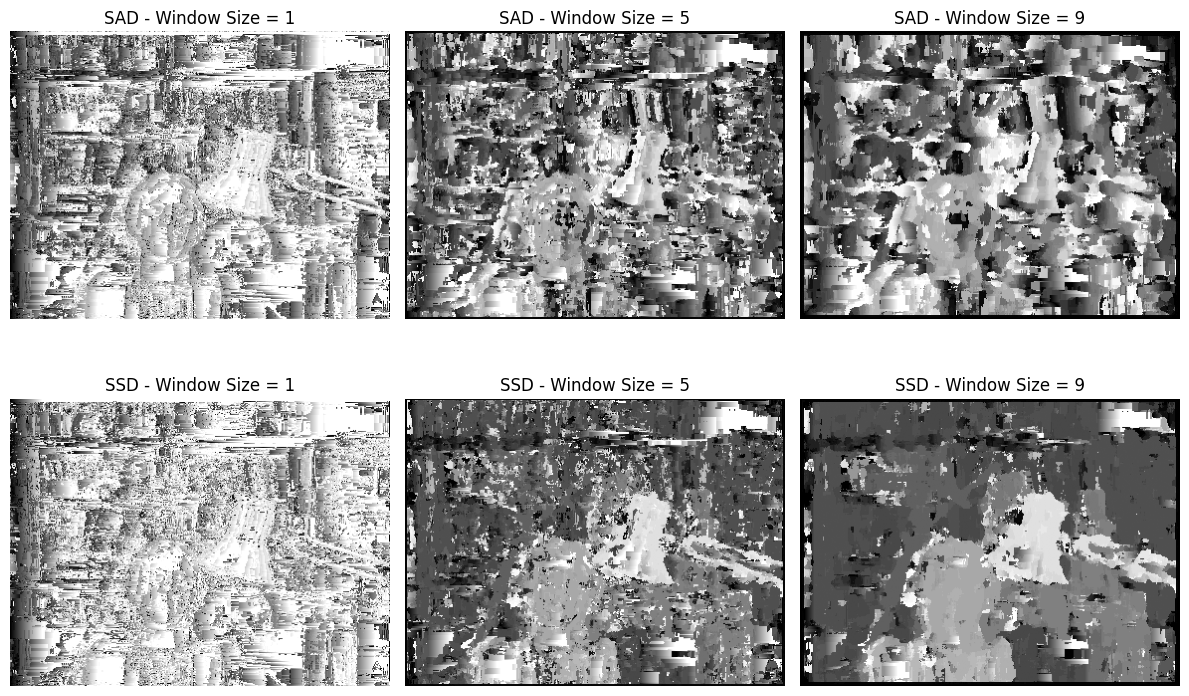

In [25]:

fig, axes = plt.subplots(2, 3, figsize=(12, 8))

axes[0, 0].imshow(normalized_d_maps[0], cmap='gray')
axes[0, 0].set_title("SAD - Window Size = 1")
axes[0, 0].axis("off")

axes[0, 1].imshow(normalized_d_maps[1], cmap='gray')
axes[0, 1].set_title("SAD - Window Size = 5")
axes[0, 1].axis("off")

axes[0, 2].imshow(normalized_d_maps[2], cmap='gray')
axes[0, 2].set_title("SAD - Window Size = 9")
axes[0, 2].axis("off")

axes[1, 0].imshow(normalized_d_maps[3], cmap='gray')
axes[1, 0].set_title("SSD - Window Size = 1")
axes[1, 0].axis("off")

axes[1, 1].imshow(normalized_d_maps[4], cmap='gray')
axes[1, 1].set_title("SSD - Window Size = 5")
axes[1, 1].axis("off")

axes[1, 2].imshow(normalized_d_maps[5], cmap='gray')
axes[1, 2].set_title("SSD - Window Size = 9")
axes[1, 2].axis("off")

plt.tight_layout()
plt.show()


In [26]:
WINDOW_SIZES = [1,5,9]
COST_FN = ['SAD','SSD']
d_maps = []
normalized_d_maps=[]

for c in COST_FN:
    for w_s in WINDOW_SIZES:
        dm , n_dm =  get_d_map(l2,r2,c,w_s)
        d_maps.append(dm)
        normalized_d_maps.append(n_dm)


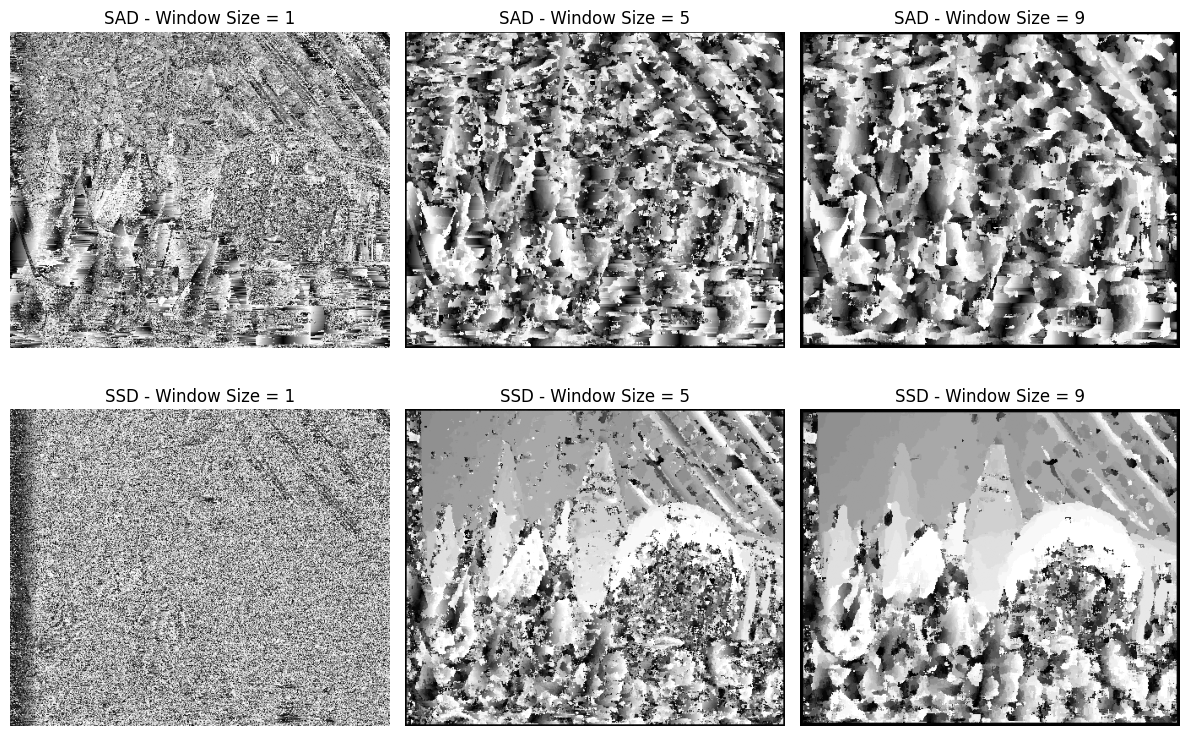

In [27]:

fig, axes = plt.subplots(2, 3, figsize=(12, 8))

axes[0, 0].imshow(d_maps[0], cmap='gray')
axes[0, 0].set_title("SAD - Window Size = 1")
axes[0, 0].axis("off")

axes[0, 1].imshow(d_maps[1], cmap='gray')
axes[0, 1].set_title("SAD - Window Size = 5")
axes[0, 1].axis("off")

axes[0, 2].imshow(d_maps[2], cmap='gray')
axes[0, 2].set_title("SAD - Window Size = 9")
axes[0, 2].axis("off")

axes[1, 0].imshow(d_maps[3], cmap='gray')
axes[1, 0].set_title("SSD - Window Size = 1")
axes[1, 0].axis("off")

axes[1, 1].imshow(d_maps[4], cmap='gray')
axes[1, 1].set_title("SSD - Window Size = 5")
axes[1, 1].axis("off")

axes[1, 2].imshow(d_maps[5], cmap='gray')
axes[1, 2].set_title("SSD - Window Size = 9")
axes[1, 2].axis("off")

plt.tight_layout()
plt.show()


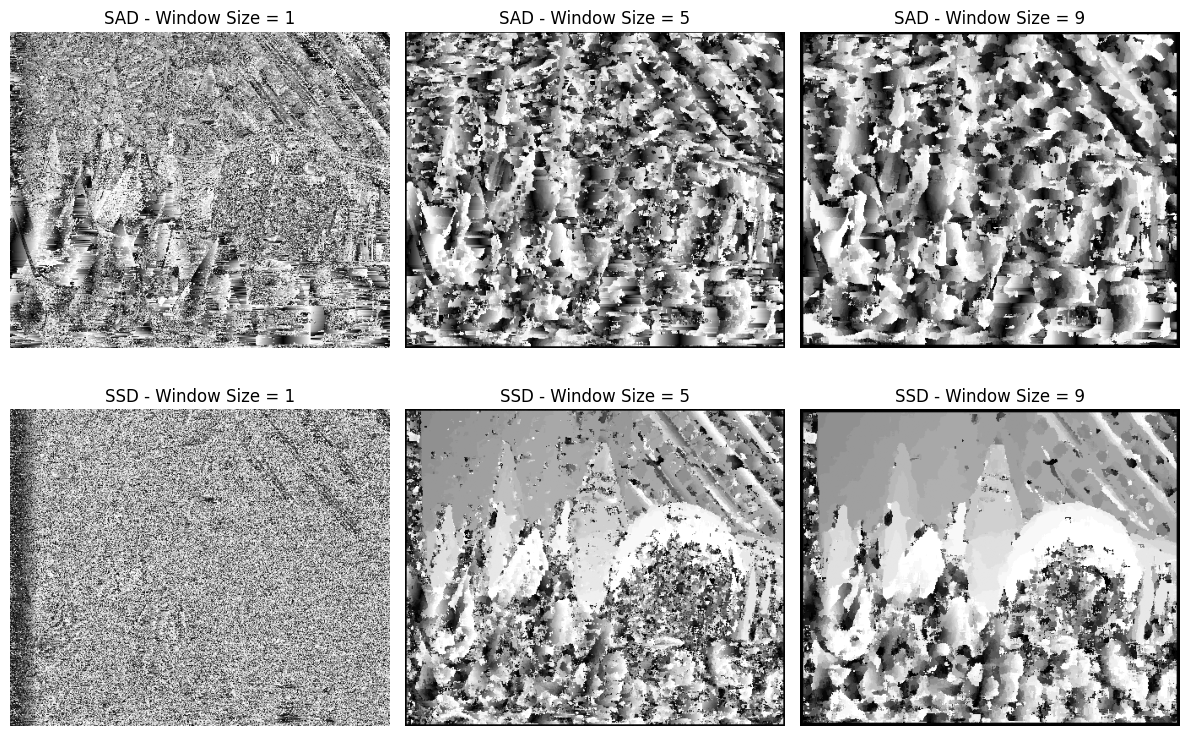

In [28]:

fig, axes = plt.subplots(2, 3, figsize=(12, 8))

axes[0, 0].imshow(normalized_d_maps[0], cmap='gray')
axes[0, 0].set_title("SAD - Window Size = 1")
axes[0, 0].axis("off")

axes[0, 1].imshow(normalized_d_maps[1], cmap='gray')
axes[0, 1].set_title("SAD - Window Size = 5")
axes[0, 1].axis("off")

axes[0, 2].imshow(normalized_d_maps[2], cmap='gray')
axes[0, 2].set_title("SAD - Window Size = 9")
axes[0, 2].axis("off")

axes[1, 0].imshow(normalized_d_maps[3], cmap='gray')
axes[1, 0].set_title("SSD - Window Size = 1")
axes[1, 0].axis("off")

axes[1, 1].imshow(normalized_d_maps[4], cmap='gray')
axes[1, 1].set_title("SSD - Window Size = 5")
axes[1, 1].axis("off")

axes[1, 2].imshow(normalized_d_maps[5], cmap='gray')
axes[1, 2].set_title("SSD - Window Size = 9")
axes[1, 2].axis("off")

plt.tight_layout()
plt.show()